In [1]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
#import zip file manuplating module
import zipfile
sample = zipfile.ZipFile('sample_submission.zip')
sample = pd.read_csv(sample.open('sample_submission.csv'))
sample.head()

,id,project_is_approved
0,p233245,0.847682
1,p096795,0.847682
2,p236235,0.847682
3,p233680,0.847682
4,p171879,0.847682


In [3]:
train = zipfile.ZipFile('train.zip')
train = pd.read_csv(train.open('train.csv'))
train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [4]:
test = zipfile.ZipFile('test.zip')
test = pd.read_csv(test.open('test.csv'))

/Users/KunWuYao/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
resources = zipfile.ZipFile('resources.zip')
resources = pd.read_csv(resources.open('resources.csv'))
resources.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [20]:
resources[resources['quantity'] > 200]

,id,description,quantity,price
3158,p251699,"Mead Spiral 1-Subject Notebook, 8 1/2"" x 10 1/...",350,0.69
9639,p211958,"Maxwell Eb-95 Stereo Earbuds, White",275,2.59
16561,p150057,"National Composition Notebook, Flexible Black ...",600,1.36
24701,p113896,"10210-1008: Blick All Media Paper - 15"" x 22""...",500,0.31
37500,p047402,"Staples Poly Composition Notebook, Assorted Co...",750,0.90
47154,p160016,"Mead Spiral 1-Subject Notebook, 8 1/2"" x 10 1/...",240,0.71
54284,p184543,"Staples Composition Notebook, Wide Ruled, Blac...",350,1.10
54618,p002499,"23895-1042: Blick Glue Stick - 0.28 oz, White",250,0.34
59507,p041983,"Mead Spiral 1-Subject Notebook, 8 1/2"" x 10 1/...",350,0.69
60294,p069334,Staples 18 Gallon Plastic Flat Lid Tote (28763),206,5.09


In [21]:
#note that price is only for one quantity of the resource
resources['total_price'] = resources['quantity'] * resources['price']
sum_total_price = pd.DataFrame(resources.groupby('id').total_price.sum())
sum_total_price.head()

,total_price
id,
p000001,833.63
p000002,630.28
p000003,298.97
p000004,1126.22
p000005,702.31


In [22]:
#append resources items to train and test
train = pd.merge(train, sum_total_price, on='id')
test = pd.merge(test, sum_total_price, on = 'id')

## Notes on the Essay Data
Prior to May 17, 2016, the prompts for the essays were as follows:

#### project_essay_1: "Introduce us to your classroom"
#### project_essay_2: "Tell us more about your students"
#### project_essay_3: "Describe how your students will use the materials you're requesting"
#### project_essay_4: "Close by sharing why your project will make a difference"
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:

#### project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."
#### project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"
For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.



In [23]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Items which might have the most importance and relevance: teacher_number_of_previously_posted_projects, price
Check if experience would make the project easier to get funded.

In [24]:
#check experience
train["teacher_number_of_previously_posted_projects"].describe()

count    182080.000000
mean         11.237055
std          28.016086
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         451.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

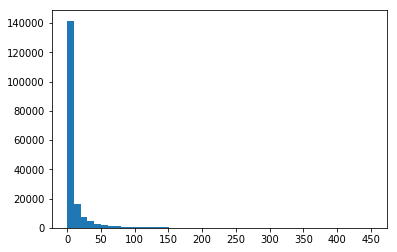

In [25]:
# Plot histogram with 45 bins; each bin representing a range of 10
plt.hist(train["teacher_number_of_previously_posted_projects"], bins=45)
plt.xticks(range(0, 500, 50))
plt.show()

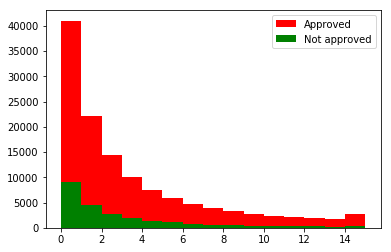

In [27]:
plt.hist(train[train["project_is_approved"] == True]["teacher_number_of_previously_posted_projects"], 
         histtype = 'bar', bins=[i for i in range(16)], range = (0,15),
         label = "Approved",
         color = 'red', stacked = True)
plt.hist(train[train["project_is_approved"] == False]["teacher_number_of_previously_posted_projects"], 
         histtype = 'bar', bins=[i for i in range(16)], range = (0,15),
         label = "Not approved",
         color = 'green', stacked = True)
plt.legend()

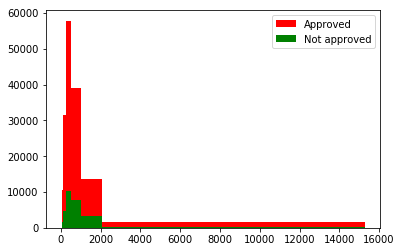

In [30]:
#price impact?
plt.hist(train[train["project_is_approved"] == True]["total_price"], 
         histtype = 'bar', bins=[2 ** i for i in range(0, 12)] + [train['total_price'].max()],
         label = "Approved",
         color = 'red', stacked = True)
plt.hist(train[train["project_is_approved"] == False]["total_price"], 
         histtype = 'bar', bins=[2 ** i for i in range(0, 12)] + [train['total_price'].max()],
         label = "Not approved",
         color = 'green', stacked = True)
plt.legend()

In [31]:
#create baseline model (linear model)
from sklearn.linear_model import LogisticRegression
#LogisticRegression needs more than one feature
#from sklearn.svm import LinearSVC #it's classification, but we need a regression algorithm
from sklearn.linear_model import LinearRegression
#use default setting
train["project_is_approved"].astype(float)
#normalization
test['total_price'] /= train['total_price'].max()
train['total_price'] /= train['total_price'].max()
lr_model = LogisticRegression()
lr_model.fit(train[['teacher_number_of_previously_posted_projects', "total_price"]], 
             train["project_is_approved"].astype(float))
prediction= lr_model.predict_proba(test[['teacher_number_of_previously_posted_projects', "total_price"]])[:,1]
#prediction

In [32]:
#Check the total loss with log_loss function
from sklearn.metrics import log_loss
score_X = lr_model.predict_proba(train[['teacher_number_of_previously_posted_projects', "total_price"]])[:,1]
log_loss(train["project_is_approved"].astype(float), score_X)

0.4232445124085557

In [34]:
sample = pd.Series(prediction)
submit = pd.DataFrame({'id': test['id'], 
                      'project_is_approved': sample})
submit.to_csv('submit.csv', index = False)

## Baseline: 0.57347

In [15]:
#what is the percentage of approved projects in the training set?
sum(train["project_is_approved"]) / len(train)

0.8476823374340949

## How skewed is the dataset?
#### About 85% was approved and the other 15% didn't get approval
So our job is try to find out what makes the 15% fail.

### project_grade_category & school_state

In [19]:
print("grade categories: ", len(train['project_grade_category'].unique()))
print("school state: ", len(train['school_state'].unique()))

grade categories:  4
school state:  51


In [20]:
for _, group in train.groupby(['project_grade_category']):
    print(group['project_is_approved'].sum() / len(group))

0.8539768489997082
0.8434585239564493
0.835235650701764
0.8471241033969414


In [147]:
for state, group in train.groupby(['school_state']):
    print("state {} approval: {:6.4f}".format(state, group['project_is_approved'].sum() / len(group)))

state AK approval: 0.8492
state AL approval: 0.8484
state AR approval: 0.8321
state AZ approval: 0.8417
state CA approval: 0.8564
state CO approval: 0.8458
state CT approval: 0.8713
state DC approval: 0.8126
state DE approval: 0.8913
state FL approval: 0.8245
state GA approval: 0.8341
state HI approval: 0.8435
state IA approval: 0.8462
state ID approval: 0.8419
state IL approval: 0.8538
state IN approval: 0.8479
state KS approval: 0.8528
state KY approval: 0.8577
state LA approval: 0.8340
state MA approval: 0.8601
state MD approval: 0.8363
state ME approval: 0.8585
state MI approval: 0.8445
state MN approval: 0.8574
state MO approval: 0.8575
state MS approval: 0.8434
state MT approval: 0.8281
state NC approval: 0.8535
state ND approval: 0.8669
state NE approval: 0.8519
state NH approval: 0.8671
state NJ approval: 0.8434
state NM approval: 0.8221
state NV approval: 0.8568
state NY approval: 0.8536
state OH approval: 0.8715
state OK approval: 0.8344
state OR approval: 0.8556
state PA app

Since different grades and states are not the reasons making a project approved or fail, we might need some other feature engineering to figure out what makes the differences.

### project_subject_categories & project_subject_subcategories

In [148]:
#len(train['project_subject_categories'].unique())
for category, group in train.groupby(['project_subject_categories']):
    print("category {} approval: {:6.4f}".format(category, group['project_is_approved'].sum() / len(group)))

category Applied Learning approval: 0.8149
category Applied Learning, Health & Sports approval: 0.8134
category Applied Learning, History & Civics approval: 0.7954
category Applied Learning, Literacy & Language approval: 0.8612
category Applied Learning, Math & Science approval: 0.8036
category Applied Learning, Music & The Arts approval: 0.8098
category Applied Learning, Special Needs approval: 0.8118
category Applied Learning, Warmth, Care & Hunger approval: 0.6364
category Health & Sports approval: 0.8468
category Health & Sports, Applied Learning approval: 0.8519
category Health & Sports, History & Civics approval: 0.8209
category Health & Sports, Literacy & Language approval: 0.8479
category Health & Sports, Math & Science approval: 0.8489
category Health & Sports, Music & The Arts approval: 0.7824
category Health & Sports, Special Needs approval: 0.8611
category Health & Sports, Warmth, Care & Hunger approval: 0.9032
category History & Civics approval: 0.8320
category History & C

Approval varies in different categories, and many categories contain more than 1 item. Let's try to extract all the groups and see if specific group reachs extremely high or low approval percentage.

In [141]:
def uniform_subject_category(df):
    #replace the ',' first
    temp = df['project_subject_categories'].str.replace('Warmth, Care', 'Warmth & Care')
    #separate the categories
    temp = temp.str.split(', ').apply(lambda x: sorted(x))
    temp = temp.apply(lambda x: ', '.join(x))
    return temp

In [149]:
train['project_subject_categories'] = uniform_subject_category(train)

In [169]:
for category, group in train.groupby(['project_subject_categories']):
    print("category {} approval: {:6.4f} for {}".format(category, 
                                                        group['project_is_approved'].sum() / len(group),
                                                       len(group['project_is_approved'])))

category Applied Learning approval: 0.8149 for 6310
category Applied Learning, Health & Sports approval: 0.8221 for 1315
category Applied Learning, History & Civics approval: 0.7880 for 368
category Applied Learning, Literacy & Language approval: 0.8608 for 4763
category Applied Learning, Math & Science approval: 0.8194 for 3782
category Applied Learning, Music & The Arts approval: 0.8082 for 1262
category Applied Learning, Special Needs approval: 0.8118 for 2481
category Applied Learning, Warmth & Care & Hunger approval: 0.6364 for 22
category Health & Sports approval: 0.8468 for 16951
category Health & Sports, History & Civics approval: 0.8391 for 87
category Health & Sports, Literacy & Language approval: 0.8411 for 1435
category Health & Sports, Math & Science approval: 0.8081 for 1167
category Health & Sports, Music & The Arts approval: 0.7687 for 294
category Health & Sports, Special Needs approval: 0.8586 for 2432
category Health & Sports, Warmth & Care & Hunger approval: 0.9032 

### Approval of  the subjects vary widely in different categories

In [168]:
eda_min = 0.75
eda_max = 0.9
for category, group in train.groupby(['project_subject_subcategories']):
    if group['project_is_approved'].sum() / len(group) < eda_min and len(group['project_is_approved']) >= 50:
        print("category {} approval: {:6.4f} for {}".format(category, 
                                                            group['project_is_approved'].sum() / len(group),
                                                           len(group['project_is_approved'])))
    if group['project_is_approved'].sum() / len(group) > eda_max and len(group['project_is_approved']) >= 50:
        print("category {} approval: {:6.4f} for {}".format(category, 
                                                            group['project_is_approved'].sum() / len(group),
                                                           len(group['project_is_approved'])))

category Character Education, Extracurricular approval: 0.7449 for 98
category Character Education, Visual Arts approval: 0.7405 for 131
category Community Service approval: 0.7468 for 79
category ESL, Health & Life Science approval: 0.7049 for 61
category Early Development, Health & Life Science approval: 0.7231 for 65
category Gym & Fitness, Literacy approval: 0.7143 for 70
category Health & Life Science, Nutrition Education approval: 0.6310 for 84
category History & Geography, Literacy approval: 0.9070 for 882
category History & Geography, Music approval: 0.9615 for 52
category Literacy, Music approval: 0.9061 for 245
category Literacy, Social Sciences approval: 0.9062 for 661
category Music, Visual Arts approval: 0.7368 for 76
category Parent Involvement, Visual Arts approval: 0.9245 for 53
category Warmth, Care & Hunger approval: 0.9220 for 2191


OK, now we see there are extremely high or low approval rates in specific categories, but most of them have only few samples, which means we can't count on them to filter out the unapproved projects.